# Week 7: Model Evaluation 🔍

# Pre-module

In the previous week, we trained a model using the training data and improved the model by tuning hyperparameters. This week, we will use the test data to do a final evaluation of how well our model performs on unseen data, or our *test set*. This is the final step of the pipeline.

We will define a few metrics/tools in this pre-module exercise, and ask you to do some simple hand calculations to understand what they measure. Then, in this week's tutorial, you will be using the sci-kit learn library to generate these results automatically for the breast cancer model and interpret the results. 

## Learning objectives

In this pre-module exercis,e we will define:
1. Accuracy 
2. Confusion matrix
3. Precision & Recall
4. F1-score

Note that the word <span style="background-color: #AFEEEE">**performance**</span> is sometimes used to refer to *speed* (i.e., how fast a model can process an input sample and generate a prediction). For this module, **performance** will always refer to the *quality* of a model's predictions. 

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data from the table
true_labels = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]
predicted_labels = [1, 0, 1, 1, 1, 0, 0, 1, 0, 1]

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

### Accuracy

*Note:* Accuracy was introduced in the Module 5 notebook.

<span style="background-color: #AFEEEE">**Accuracy**</span> is the number of correct predictions divided by the total number of predictions made, given by the formula:

$$
\text{Accuracy} = \frac{\text{\# of correct predictions}}{\text{\# of total predictions}}
$$

For example, if we ran the breast cancer detection model on 10 samples and got the following predictions, where 0 is benign and 1 is malignant:

| Breast cancer sample # | True Label | Predicted Label |
| --- | --- | --- |
| 1 | 0 | 0 |
| 2 | 0 | 0 |
| 3 | 1 | 0 |
| 4 | 0 | 1 |
| 5 | 1 | 1 |
| 6 | 1 | 0 |
| 7 | 0 | 0 |
| 8 | 0 | 0 |
| 9 | 0 | 0 |
| 10 | 0 | 0 |

**IMPORTANT**: By convention, benign is 0 and malignant is 1. In medical diagnosis, the test result for a disease like cancer is positive if the cell is malignant (cancerous), and negative if the cell is benign (not cancerous). Remember this convention as we work with this breast cancer dataset.
* benign = 0 = negative
* malignant = 1 = positive

We can see that all samples except 3, 4, and 6 are correctly predicted, so accuracy = 7/10 = 70%. 

**Q1. The following table shows a model's predictions on the test set. What is the accuracy of this model?**

| Breast cancer sample # | True Label | Predicted Label |
| --- | --- | --- |
| 1 | 1 | 1 |
| 2 | 0 | 0 |
| 3 | 1 | 1 |
| 4 | 0 | 1 |
| 5 | 1 | 1 |
| 6 | 0 | 0 |
| 7 | 0 | 0 |
| 8 | 1 | 1 |
| 9 | 0 | 0 |
| 10 | 1 | 1 |

<span style="background-color: #FFD700">**Write your answer below**</span>

---

### Confusion Matrices

When we investigated accuracy, we didn't consider the type of misprediction (predicting malignant when it is  benign, or predicting benign when it is malignant), we grouped all mispredictions together in the calculation.
Can you think of why this might lead to oversights? If you are training a model to detect potentially life-threatening cancer cells, which type of misprediction do you think is more important to avoid: 

1. The model predicts 'malignant' for a benign cancer cell, or
2. The model predicts 'benign' for a malignant cancer cell?

Both situations are dire. In the first case, while additional tests are conducted in the case of a false positive, there is immense patient stress associated with the diagnosis. However, the second case is more serious. The patient could go home with a benign diagnosis only to find out later, when it is too late for treatment, that it was actually malignant.

This is just one example of why you might care about the type of misprediction. In formal terms, if 'malignant' is considered a **positive result**, then case 1 would be a **false positive** and case 2 would be a **false negative**. Likewise, a correct prediction on a benign cell is a **true negative** and a correct prediction on a malignant cell is a **true positive**. You might recognize false positives as Type I errors and false negatives as Type II errors from your statistics courses.

* **False positive** (FP): predicted positive, but the true label was actually negative, also known as a *Type I error*
* **False negative** (FN): predicted negative, but the true label was actually positive, also known as a *Type II error*
* **True positive** (TP): predicted positive, and the true label was indeed positive.
* **True negative** (TN): predicted negative, and the true label was indeed negative.

In this terminology, **True** and **False** refer to the prediction agreeing with the ground truth, and **Positive** and **Negative** refer to the prediction being positive or negative (after binarizing the data's output)

To summarize these types of predictions and mispredictions, we use a <span style="background-color: #AFEEEE">**confusion matrix**</span>. A confusion matrix arranges the number of FN, FP, TN, and TP in a matrix as such:

<img src="Table1-2.png" alt="Drawing" style="width: 700px;"/>

*image from https://plat.ai/blog/confusion-matrix-in-machine-learning/

*Note* that the axis labels (actual/predicted) can be switched on some diagrams, so FN/FP/TN/TP may not be in the exact same cell in every diagram. Make sure to follow the axis labels on the diagram you are looking at.

Hopefully by now, this matrix isn't confusing at all, contrary to its name.


**Q2. Here is the corresponding confusion matrix for the data from question 1.**

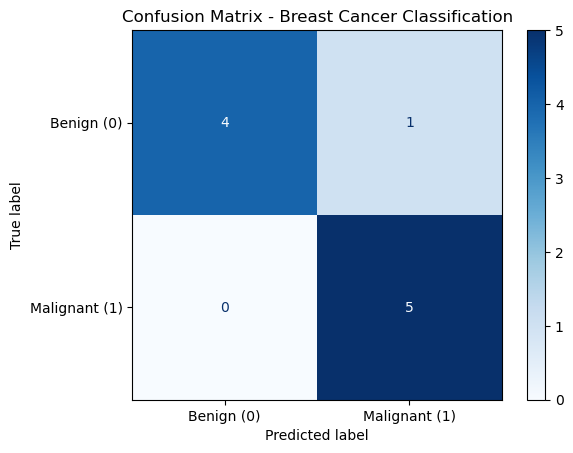

In [2]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.show()

**Identify the number of FP, FN, TP, and TN from the confusion matrix of model A below. Assume benign is negative and malignant is positive (this is the common convention for benign/malignant classifications).**

<span style="background-color: #FFD700">**Write your answer below**</span>


Answer:
* FN: 
* FP: 
* TN: 
* TP: 

**Q3. What is the accuracy for model A based on this confusion matrix?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q4. Let's generalize the accuracy calculation. What is the formula for accuracy in terms of FP, FN, TP, TN?**

<span style="background-color: #FFD700">**Write your answer below**</span>


---

### Precision & Recall

Consider the same table of predictions and true labels from the accuracy example:

| Breast cancer sample # | True Label | Predicted Label |
| --- | --- | --- |
| 1 | 0 | 0 |
| 2 | 0 | 0 |
| 3 | 1 | 0 |
| 4 | 0 | 1 |
| 5 | 1 | 1 |
| 6 | 1 | 0 |
| 7 | 0 | 0 |
| 8 | 0 | 0 |
| 9 | 0 | 0 |
| 10 | 0 | 0 |

Previously, we calculated accuracy to be 70% on this dataset. Is this a good performance? Or is there more to the story?

Well, now that we know to be wary of the *type* of misprediction, let's look a little closer. There are a total of 7 actual negatives and 3 actual positives (see the True Label column). The model made 2 positive predictions and 8 negative ones (Predicted Label column). There are two interesting observations we can make:

1. Out of the 2 positive predictions the model made, **only one was correct** (sample 5). 
2. Out of the 3 actual positives (malignant cells), the model **only predicted 1 to be positive** (also sample 5).

Uh-oh. By this logic, our model doesn't seem so good anymore. Only 50% of its positive predictions are correct, and only 33.3% of the dataset's actual positives were correctly predicted! **Accuracy alone may not be a good measure of performance**, especially **when the dataset is imbalanced** like this one (there are many more actual negatives than actual positives). This is such a fundamental realization that we use the terms <span style="background-color: #AFEEEE">**precision**</span> and <span style="background-color: #AFEEEE">**recall**</span> to describe the two metrics above, respectively:

|  | Definition | Formula | Example (from above) |
| --- | --- | --- | --- |
| **Precision** | The fraction of correct positive predictions out of all positive predictions | $$\frac{\text{TP}}{\text{TP} + \text{FP}}$$ | Out of the 2 positive predictions the model made, **only one was actually positive** |
| **Recall** | The fraction of correct positive predictions out of all actual positives | $$\frac{\text{TP}}{\text{TP} + \text{FN}}$$ | Out of the 3 actual positives, the model **only predicted 1 to be positive** |



Like accuracy, precision and recall are in the range $[0.0, 1.0]$, and a value closer to 1.0 indicates better performance. **Think about why we have these bounds.**

### Precision-Recall Tradeoff

It is often not possible to achieve both high precision and recall, so there is a **tradeoff** between the two. If we want to catch all the positive cancer cells (increase recall), we need to be more aggressive in making positive predictions. But the more aggressively we predict positives, we may end up predicting even the negative ones as positive (decreases precision). 

We often have to compare a model with high precision against a model with high recall, and the f1-score (which we will cover later in this notebook) helps determine which one is better. 

**Below is the same confusion matrix for model A from questions 2-4.**

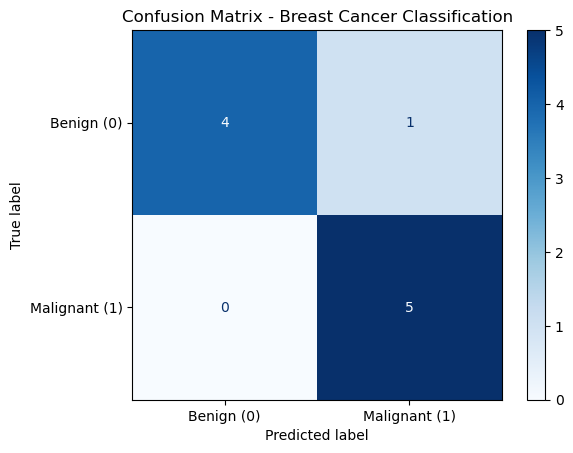

In [3]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.show()

**Q5. What is the precision of model A?**

<span style="background-color: #FFD700">**Write your answer below**</span>


---

**Q6. What is the recall of model A?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q7. Compare the precision, the recall, and the accuracy you found in question 4. Discuss the model performance (is it generally good or generally bad? Is there room for improvement, and why/why not?).**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q8. Imagine your model has a massive error that results in it predicting all samples as malignant. What would the precision and recall be in this case? What about the converse case where the model predicts all samples as benign?**

<span style="background-color: #FFD700">**Write your answer below**</span>


---

### F1-score

Precision and recall are good metrics to use for imbalanced datasets. However, we run into a problem when we have to compare models. What if model A has high precision and low recall, while model B has low precision and high recall? Could we say for certain which model we prefer? 

Since precision and recall give us different information, both of which are valuable to us, we would like to blend the two into one metric that can be used to represent the quality of the model as a whole. We can "blend" these by taking the average = (precision + recall)/2, but to avoid overly optimistic results, we will use a special type of mean that penalizes low scores. This method uses reciprocals of the scores to calculate a mean; extremely low precision/recall values result in a lower mean than what the simple average calculation would give us. This value is called the **f1-score**. 

<span style="background-color: #AFEEEE">**F1-score**</span>: A blend of precision and recall that gives more weight to lower scores.

$$
\begin{align*}
f1 \text{ score} &= 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} \\
&= \frac{TP}{TP + \frac{1}{2}(FP + FN)}
\end{align*}
$$

Again, f1-scores are in the range [0.0, 1.0], and a value closer to 1.0 indicates better performance.

**Q8. Below is the same confusion matrix for model A from questions 2-4 and 5-7. What is the f1-score of model A?**

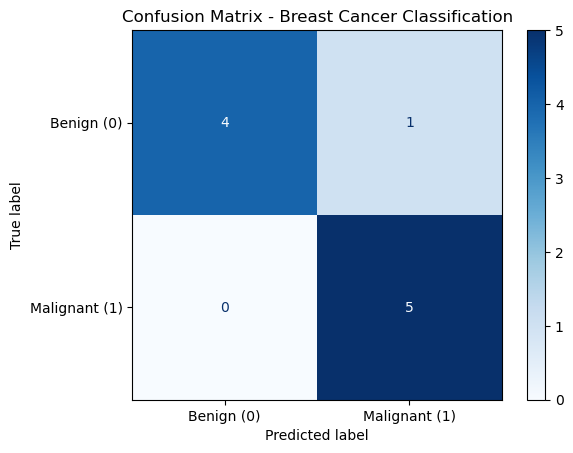

In [4]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=['Benign (0)', 'Malignant (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.show()

<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q9. Say we have another model, model B, evaluated on the same dataset with the following information:** 
* FN: 2
* FP: 10
* TN: 38
* TP: 93

**What is the precision and recall of model B? Compare them to the precision and recall you found for model A in questions 5 and 6.**


<span style="background-color: #FFD700">**Write your answer below**</span>

Answer: 
* precision = 
* recall = 
* precision A ? precision B
* recall A ? recall B

**Q10. What is the f1-score of model b? Use this formula: TP / [TP + (1/2)*(FP + FN)]**


<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q11. Based on the f1-score you calculated in question 10, would you say model A or model B is better?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

## Conclusion

Depending on the use case for your model, you may want to focus on one metric over the other. For this cancer detection model, you could argue that high recall is more important because you don't want to let cancer cells go undetected. 

Consider some other use cases:
* Research on predicting the pathogenicity of genetic variants: Precision might be crucial to avoid misclassifying benign variants as pathogeneic, following the precautionary principle. 
* Personalized Medicine (tailoring medical treatments based on an individual's genomic profile): Precision might be crucial to avoid recommending treatments based on false-positive genetic associations.
* Plant Phenotyping: Phenotyping plants for various traits, such as drought resistance or yield. Accuracy could be important to ensure that the measured traits accurately reflect the plant's characteristics. (Make sure your dataset is balanced!)

In this module, you have seen how to calculate and interpret different metrics for performance. Here is a summary of the metrics we covered:

|  | Definition | Formula |
| --- | --- | --- |
| Accuracy | The number of correct predictions out of all predictions. | $ \frac{TP + TN}{TP + TN + FP + FN} $ |
| Precision | The number of correctly predicted positives out of all positive predictions | $ \frac{TP}{TP + FP} $ |
| Recall | The number of correctly predicted positives out of all actual positives | $ \frac{TP}{TP + FN} $ |
| F1-score | The mean of the reciprocals of precision and recall. | $2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{TP}{TP + \frac{1}{2}(FP + FN)}$ |

As well as the quadrants of the confusion matrix:
* **False positive** (FP): predicted positive, but the true label was actually negative. (Type I error)
* **False negative** (FN): predicted negative, but the true label was actually positive. (Type II error)
* **True positive** (TP): predicted positive, and the true label was indeed positive.
* **True negative** (TN): predicted negative, and the true label was indeed negative.


In the tutorial, we will use these metrics on the breast cancer model we trained last week. 